In [30]:
import pandas as pd

In [31]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.shape

(200, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [37]:
from sklearn.cluster import KMeans
k_means = KMeans()
k_means.fit(X)

KMeans()

In [38]:
k_means.fit_predict(X)

array([1, 7, 1, 7, 1, 7, 1, 3, 1, 7, 1, 3, 1, 7, 1, 7, 1, 7, 1, 3, 1, 7,
       1, 7, 1, 7, 1, 7, 1, 3, 1, 7, 1, 3, 1, 7, 1, 7, 1, 7, 1, 3, 5, 5,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 2, 5, 5, 5, 5,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 6, 0, 2, 0, 6, 0, 6, 0,
       2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 2, 0, 6, 0, 2, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 2, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [39]:
wcss = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    wcss.append(km.inertia_)

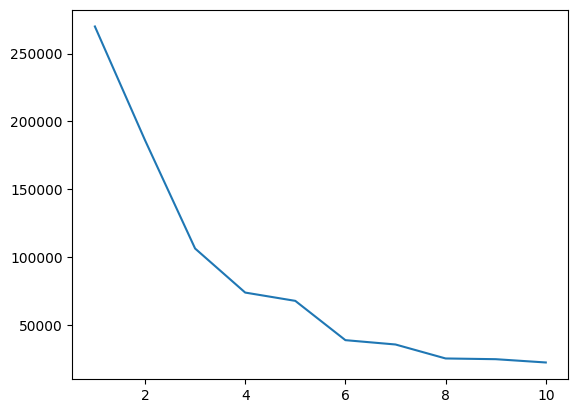

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [41]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

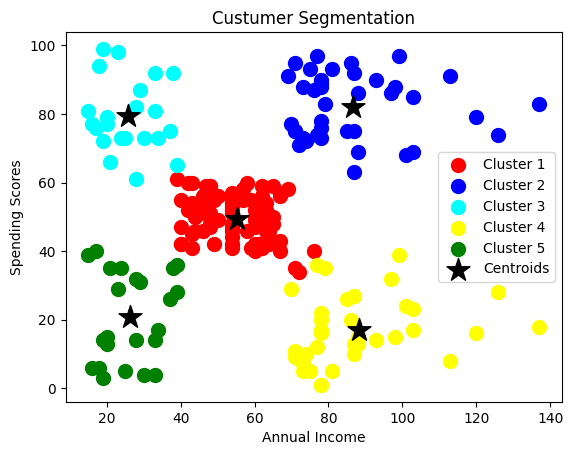

In [42]:
# Your scatter plots for each cluster
plt.scatter(X.iloc[y_means==0, 0], X.iloc[y_means==0, 1], s=100, c='red', label="Cluster 1")
plt.scatter(X.iloc[y_means==1, 0], X.iloc[y_means==1, 1], s=100, c='blue', label="Cluster 2")
plt.scatter(X.iloc[y_means==2, 0], X.iloc[y_means==2, 1], s=100, c='cyan', label="Cluster 3")
plt.scatter(X.iloc[y_means==3, 0], X.iloc[y_means==3, 1], s=100, c='yellow', label="Cluster 4")
plt.scatter(X.iloc[y_means==4, 0], X.iloc[y_means==4, 1], s=100, c='green', label="Cluster 5")

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], 
            s=300, c='black', label='Centroids', marker='*')

plt.title("Custumer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Scores")

plt.legend()
plt.show()

In [43]:
k_means.predict([[15,39]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [45]:
import joblib
joblib.dump(k_means,"Custumer Segmentation")


['Custumer Segmentation']

In [47]:
model = joblib.load("Custumer Segmentation")

In [48]:
model.predict([[16,53]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)